### Step 1: Load the MNIST dataset, load all necessary modules

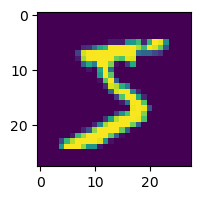

In [1]:
import os, sys
directory_path = os.path.dirname(os.path.abspath("__notebook__"))
sys.path.append('../')
import numpy as np
np.random.seed(42)
import matplotlib.pyplot as plt
from models import rbm
from torchvision import datasets
from sklearn.preprocessing import StandardScaler
train_dataset = datasets.MNIST(root='./data', train=True, download=True)
scaler = StandardScaler()
X = train_dataset.data.numpy()
n_examples = X.shape[0]
X = X.reshape(n_examples, -1)
X = scaler.fit_transform(X)
y = train_dataset.targets.numpy()
plt.figure(figsize=(2, 2))
plt.imshow(scaler.inverse_transform(X[0].reshape(1, -1)).reshape(28, 28))

### Step 2: Train the RBM (no adversary)

In [2]:
X = X[:2000]
model = rbm.RBM(
    n_vis=784,
    n_hid=1000
)
model.fit_autograd(
    X = X,
    n_gibbs=1,
    lr=0.001,
    n_epochs=300,
    batch_size=50,
    gamma=1,
    rng_seed=0,
    verbose_interval=10,
    checkpoint_path=f'{directory_path}/rbm_checkpoints/rbm_mnist_demo.pth'
)

epoch: 000 of 300 | recon_loss: 0.6890000104904175
epoch: 010 of 300 | recon_loss: 0.39899998903274536
epoch: 020 of 300 | recon_loss: 0.3529999852180481
epoch: 030 of 300 | recon_loss: 0.32600000500679016
epoch: 040 of 300 | recon_loss: 0.3070000112056732
epoch: 050 of 300 | recon_loss: 0.289000004529953
epoch: 060 of 300 | recon_loss: 0.2720000147819519
epoch: 070 of 300 | recon_loss: 0.2590000033378601
epoch: 080 of 300 | recon_loss: 0.2460000067949295
epoch: 090 of 300 | recon_loss: 0.23399999737739563
epoch: 100 of 300 | recon_loss: 0.2240000069141388
epoch: 110 of 300 | recon_loss: 0.2160000056028366
epoch: 120 of 300 | recon_loss: 0.20800000429153442
epoch: 130 of 300 | recon_loss: 0.20100000500679016
epoch: 140 of 300 | recon_loss: 0.1940000057220459
epoch: 150 of 300 | recon_loss: 0.1889999955892563
epoch: 160 of 300 | recon_loss: 0.18299999833106995
epoch: 170 of 300 | recon_loss: 0.17900000512599945
epoch: 180 of 300 | recon_loss: 0.17399999499320984
epoch: 190 of 300 | reco

### Step 3: Visualize samples

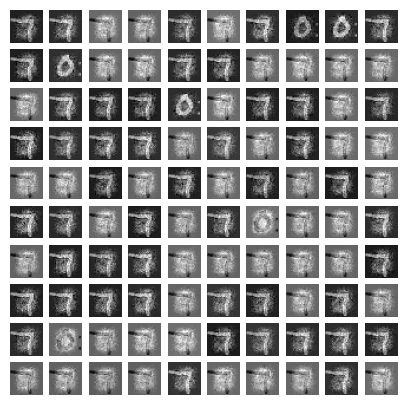

In [3]:
model = rbm.load(f'{directory_path}/rbm_checkpoints/rbm_mnist_demo.pth')
samples = model.reconstruct(np.zeros((100, 784)), n_gibbs=200)
fig, axes = plt.subplots(10, 10, figsize=(5, 5))
axes = axes.flatten()
for i in range(100):
    axes[i].imshow(scaler.inverse_transform(samples[i].reshape(1, -1))\
                   .reshape(28, 28), cmap='gray')
    axes[i].axis('off')
plt.show()

### Repeat Step 2 for RBM (trained with adversary)

In [7]:
X = X[:2000]
model = rbm.RBM(
    n_vis=784,
    n_hid=1000
)
model.fit_autograd(
    X = X,
    n_gibbs=10,
    lr=0.001,
    n_epochs=100,
    batch_size=30,
    gamma=0.5,
    gamma_delay=50,
    rng_seed=0,
    verbose_interval=10,
    reduce_lr_on_plateau=True,
    checkpoint_path=f'{directory_path}/rbm_checkpoints/rbm_mnist_demo_adv.pth'
)

epoch: 000 of 100 | recon_loss: 0.6710000038146973
epoch: 010 of 100 | recon_loss: 0.4050000011920929
epoch: 020 of 100 | recon_loss: 0.36899998784065247
epoch: 030 of 100 | recon_loss: 0.34599998593330383
epoch: 040 of 100 | recon_loss: 0.3269999921321869
epoch: 050 of 100 | recon_loss: 0.3009999990463257
epoch: 060 of 100 | recon_loss: 0.289000004529953
epoch: 070 of 100 | recon_loss: 0.2770000100135803
epoch: 080 of 100 | recon_loss: 0.2709999978542328
epoch: 090 of 100 | recon_loss: 0.26499998569488525


### Repeat Step 3 for RBM (trained with adversary)

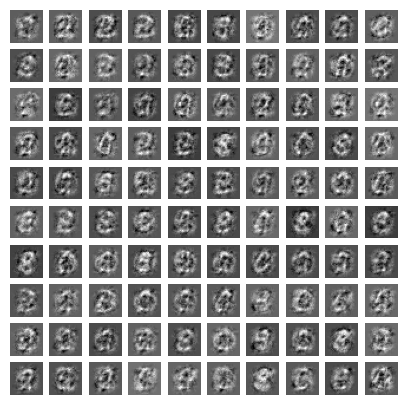

In [8]:
model = rbm.load(f'{directory_path}/rbm_checkpoints/rbm_mnist_demo_adv.pth')
samples = model.reconstruct(np.zeros((100, 784)), n_gibbs=200)
fig, axes = plt.subplots(10, 10, figsize=(5, 5))
axes = axes.flatten()
for i in range(100):
    axes[i].imshow(scaler.inverse_transform(samples[i].reshape(1, -1))\
                   .reshape(28, 28), cmap='gray')
    axes[i].axis('off')
plt.show()